# Toronto, Canada

<br> Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data
<br> Working with listing.csv file
<br> The file has 74 columns
<br> Here I start working on specific columns listed below and define them in: col_list_listings
<br> In other words, I discard empty columns, url, names, etc.

In [2]:
col_list_listings = ['id', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text'
                     , 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'has_availability'
                     , 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews'
                     , 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy'
                     , 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication'
                     , 'review_scores_location', 'review_scores_value', 'instant_bookable', 'reviews_per_month']

## Load Data

In [3]:
city='Toronto'
data_fldr='../Airbnb_data/'

df=pd.read_csv(data_fldr + city +'/listings.csv', usecols=col_list_listings)

In [4]:
df.set_index('id');

In [5]:
print(df.shape)

(15261, 28)


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15261.0,3.090755e+07,1.561377e+07,1419.00,18367370.00,32498228.00,44504326.00,53684479.0
accommodates,15261.0,3.055960e+00,2.006350e+00,0.00,2.00,2.00,4.00,16.0
bedrooms,14134.0,1.446795e+00,8.271506e-01,1.00,1.00,1.00,2.00,9.0
beds,14523.0,1.693245e+00,1.077637e+00,1.00,1.00,1.00,2.00,18.0
minimum_nights,15261.0,2.631079e+01,4.017575e+01,1.00,5.00,28.00,28.00,1125.0
maximum_nights,15261.0,6.622515e+04,8.094839e+06,1.00,91.00,1125.00,1125.00,999999999.0
availability_30,15261.0,8.993185e+00,1.148804e+01,0.00,0.00,2.00,18.00,30.0
availability_60,15261.0,2.238798e+01,2.365881e+01,0.00,0.00,14.00,45.00,60.0
availability_90,15261.0,3.737081e+01,3.645671e+01,0.00,0.00,33.00,74.00,90.0
availability_365,15261.0,1.315058e+02,1.349858e+02,0.00,0.00,87.00,251.00,365.0


## Exploratory Data Analysis
<br> Analysing Important Columns
<br> Making necessary changes or modifications in important columns

### Price
Column name = price

In [7]:
print(df['price'].dtypes)
print(df['price'][0:10])

object
0    $469.00
1     $96.00
2     $72.00
3     $45.00
4    $128.00
5    $100.00
6     $70.00
7    $120.00
8    $100.00
9    $119.00
Name: price, dtype: object


In [8]:
# removing '$' and '.' from df.price and converting it to numeric values
# however, there should be a smarter approach for converting this column to numeric values
df.price = df.price.str.replace('\$|,', '').astype('float64')

C:\Users\siava\AppData\Local\Temp/ipykernel_12268/14964403.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.price = df.price.str.replace('\$|,', '').astype('float64')


In [9]:
df.price.describe()

count    15261.000000
mean       155.451674
std        371.197012
min          0.000000
25%         67.000000
50%        101.000000
75%        165.000000
max      13000.000000
Name: price, dtype: float64

In [10]:
df.drop(df[df.price<=0].index,inplace=True)

#### 
Very few listings (count=10) have a price greater than $2,000

In [11]:
df[df.price>2000].price.count()

30

#### Necessary Transformation for Price Data
<br> Data for the price column has a log-normal distribution
<br> I will use log10 and transform this column to convert it into a Gaussian distribution for modeling purposes
<br> note that I am using log-scale on the x_axis for the histogram (axes[1]) 
<br> I used it for conveying the message and showing the necessity for a log transformation

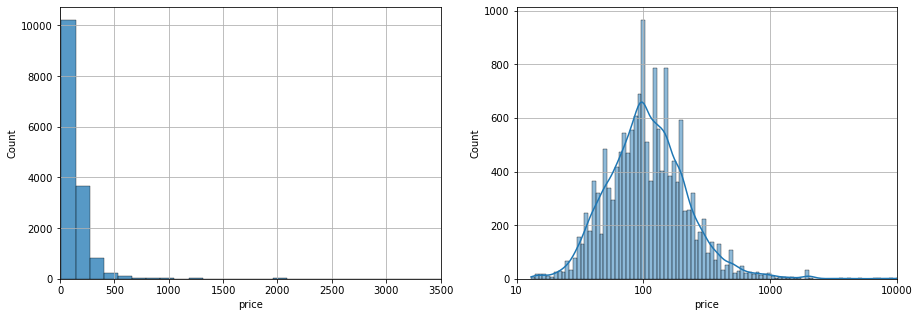

In [12]:
fig , axes = plt.subplots(1, 2, figsize=(15,5))

axes0 = sns.histplot(data=df, x=df['price'], bins=100, ax=axes[0])
axes0.grid(), axes0.set(xlim=(0, 3500));

axes1 = sns.histplot(data=df, x=np.log10(df['price']), bins=100, kde=True, ax=axes[1])
axes1.set_xticks(range(1,5));
axes1.set_xticklabels([10,100,1000,10000]);
axes1.grid(), axes1.set(xlim=(1, 4));

### Room Type
column name = room_type

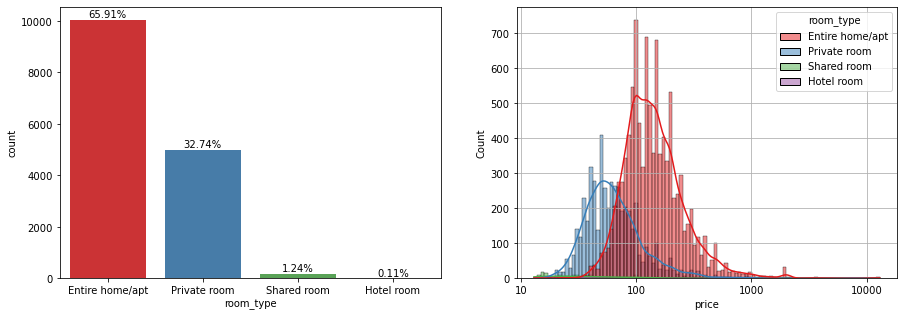

In [13]:
fig , axes = plt.subplots(1, 2, figsize=(15,5))

axes0 = sns.countplot(data=df, x=df.room_type, palette='Set1', ax=axes[0])
for p in axes0.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axes0.annotate('{:.2f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom')

axes1 = sns.histplot(data=df, x=np.log10(df['price']), bins=100, kde=True, hue=df.room_type, palette='Set1', ax=axes[1])
axes1.set_xticks(range(1,5));
axes1.set_xticklabels([10,100,1000,10000]);
axes1.grid()

### Accommodates
column name = accommodates

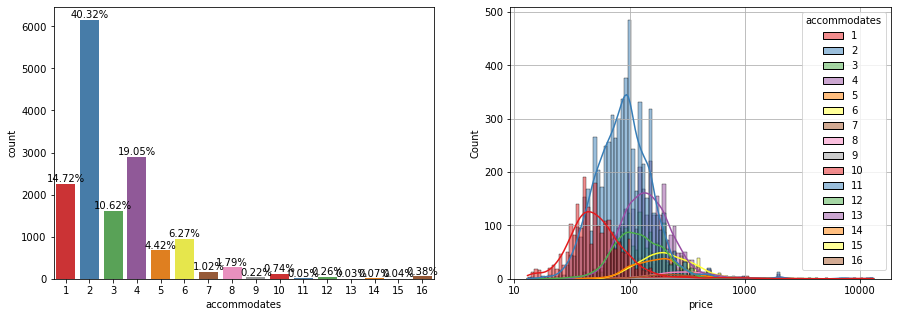

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes0 = sns.countplot(data=df, x=df.accommodates, palette='Set1', ax=axes[0])
for p in axes0.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axes0.annotate('{:.2f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom', rotation=0)

axes1 = sns.histplot(data=df, x=np.log10(df['price']), bins=100, kde=True, hue=df.accommodates, palette='Set1', ax=axes[1])
axes1.set_xticks(range(1,5));
axes1.set_xticklabels([10,100,1000,10000]);
axes1.grid()

<br> <I>accommodates</I> is an important feature in the dataset and later we see it is one the statistically significant features
<br> in some data sets the accommodation is zero, and I drop the listings where accommodates==0

In [15]:
df.drop(df[df.accommodates==0].index,inplace=True)

### Beds and Bedrooms
<br> Column name = bedrooms
<br> Column name = beds

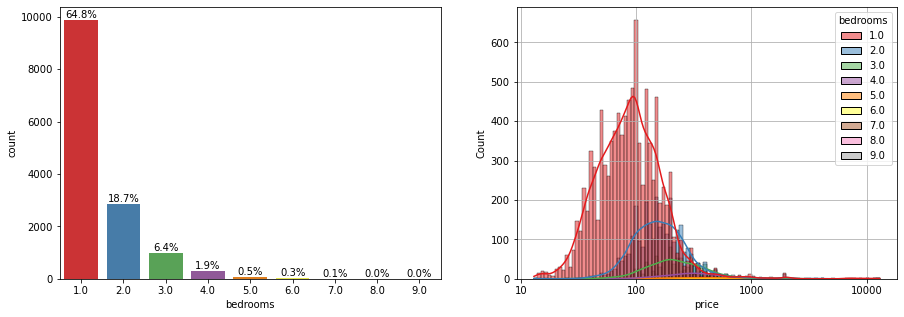

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes0 = sns.countplot(data=df, x=df.bedrooms, palette='Set1', ax=axes[0])
for p in axes0.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axes0.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom', rotation=0)

axes1 = sns.histplot(data=df, x=np.log10(df['price']), bins=100, kde=True, hue=df.bedrooms, palette='Set1', ax=axes[1])
axes1.set_xticks(range(1,5));
axes1.set_xticklabels([10,100,1000,10000]);
axes1.grid()

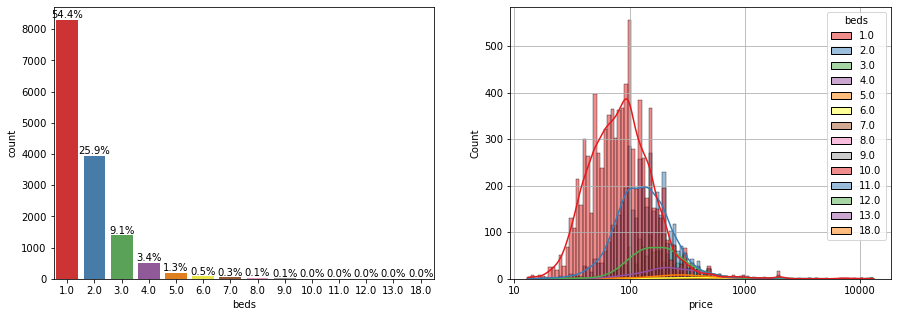

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes0 = sns.countplot(data=df, x=df.beds, palette='Set1', ax=axes[0])
for p in axes0.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axes0.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom', rotation=0)

axes1 = sns.histplot(data=df, x=np.log10(df['price']), bins=100, kde=True, hue=df.beds, palette='Set1', ax=axes[1])
axes1.set_xticks(range(1,5));
axes1.set_xticklabels([10,100,1000,10000]);
axes1.grid()

In [18]:
print('Number of missing values in beds: ', df.beds.isna().sum())
print('Number of missing values in bedrooms: ', df.bedrooms.isna().sum())

Number of missing values in beds:  735
Number of missing values in bedrooms:  1124


In [19]:
# filling missing values in: beds and bedrooms
df['beds'].fillna(df.groupby(['accommodates','room_type'])['beds'].transform('mean').transform('round'), inplace=True)
df['beds'].fillna((df['accommodates']/2).apply(np.ceil), inplace=True)
df['bedrooms'].fillna(df.groupby(['beds','room_type'])['bedrooms'].transform('mean').transform('round'), inplace=True)
df['bedrooms'].fillna((df['accommodates']/2).apply(np.ceil), inplace=True)

### Bathrooms
<br> Column name = bathroom_text

<br> bathroom_text has lots of unique items
<br> will convert it to two columns: 1) if it is shared or private, and 2) the number of bathrooms for the property

In [20]:
df.bathrooms_text.unique()

array(['3 baths', '1.5 baths', '1 shared bath', '1 bath', '2 baths',
       '1 private bath', '1.5 shared baths', '4 baths', nan, '2.5 baths',
       '5 baths', '2 shared baths', '0 baths', '3.5 baths',
       '3 shared baths', '4.5 baths', '3.5 shared baths', '5.5 baths',
       '0 shared baths', '6 baths', 'Shared half-bath', 'Half-bath',
       '2.5 shared baths', 'Private half-bath', '4 shared baths',
       '4.5 shared baths', '6.5 baths', '7.5 baths'], dtype=object)

In [21]:
df.bathrooms_text.isna().sum()

10

In [22]:
print('Number of listings with a shared bath: ', np.nansum(df.bathrooms_text.str.contains('shared')))

Number of listings with a shared bath:  3110


In [23]:
# creating a new column, 1: if bath is shared, 0: not shared or nan
df['bath_is_shared'] = pd.get_dummies(df.bathrooms_text.str.contains('shared'), drop_first=True)
# I use 0 for nan for simplicity, one could have used df.room_type to improve the estimations
df['bath_is_shared'].fillna(0, inplace=True)

In [24]:
sum(df['bath_is_shared'])

3110

In [25]:
# extracting the numerical values from bathrooms_text
df['bathroom_numbers'] = df.bathrooms_text.str.extract('([0-9][,.]*[0-9]*)')

# extracting 'half' from bathrooms_text and assigning 0.5
df['bathroom_numbers'][df.bathrooms_text.str.contains('half', na=False, regex=False)]=0.5

df['bathroom_numbers'] = pd.to_numeric(df['bathroom_numbers'])
df.drop(columns=['bathrooms_text'], inplace=True)

C:\Users\siava\AppData\Local\Temp/ipykernel_12268/110679144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bathroom_numbers'][df.bathrooms_text.str.contains('half', na=False, regex=False)]=0.5


<br> filling possibble missing values with 1 (a property should have a bathroom)

In [26]:
df['bathroom_numbers'].fillna(1, inplace=True)

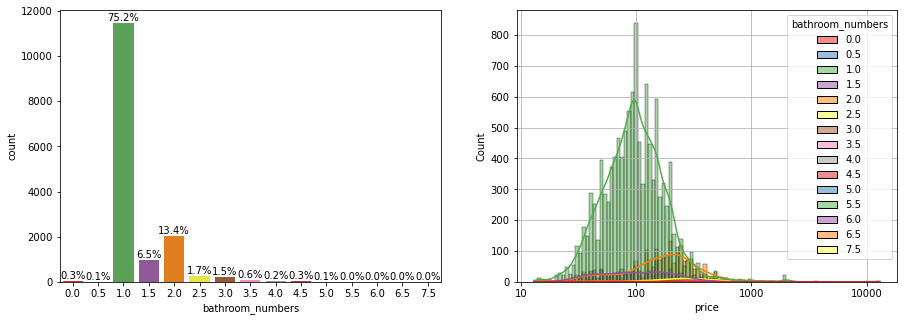

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes0 = sns.countplot(data=df, x=df.bathroom_numbers, palette='Set1', ax=axes[0])
for p in axes0.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axes0.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom', rotation=0)

axes1 = sns.histplot(data=df, x=np.log10(df['price']), bins=100, kde=True, hue=df.bathroom_numbers, palette='Set1'
                     , ax=axes[1])
axes1.set_xticks(range(1,5));
axes1.set_xticklabels([10,100,1000,10000]);
axes1.grid()

### Neighbourhood

In [28]:
print(df['neighbourhood_cleansed'].unique())
print(df['neighbourhood_cleansed'].isna().sum())

['Little Portugal' 'Waterfront Communities-The Island'
 'Briar Hill-Belgravia' 'South Riverdale' 'South Parkdale' 'Oakridge'
 'Wexford/Maryvale' 'Rosedale-Moore Park' 'Bay Street Corridor'
 'Church-Yonge Corridor' 'Niagara' 'Dufferin Grove' 'High Park North'
 'Danforth East York' 'High Park-Swansea' 'Woburn' 'Humewood-Cedarvale'
 'Junction Area' 'Cabbagetown-South St.James Town' 'Annex'
 'Caledonia-Fairbank' 'Roncesvalles' 'Casa Loma' 'North St.James Town'
 'Leaside-Bennington' 'Blake-Jones' 'Willowdale East' 'The Beaches'
 'Danforth' 'Moss Park' 'University' 'Flemingdon Park' 'East End-Danforth'
 'Woodbine Corridor' 'Brookhaven-Amesbury' 'Oakwood Village'
 'Dovercourt-Wallace Emerson-Junction' 'Trinity-Bellwoods'
 'Palmerston-Little Italy' 'Broadview North' 'Weston-Pellam Park'
 'Morningside' 'Kensington-Chinatown' 'Mount Pleasant West'
 'Don Valley Village' 'Thistletown-Beaumond Heights' 'Forest Hill South'
 'Pleasant View' 'Newtonbrook West' 'Playter Estates-Danforth'
 'Greenwood-Co

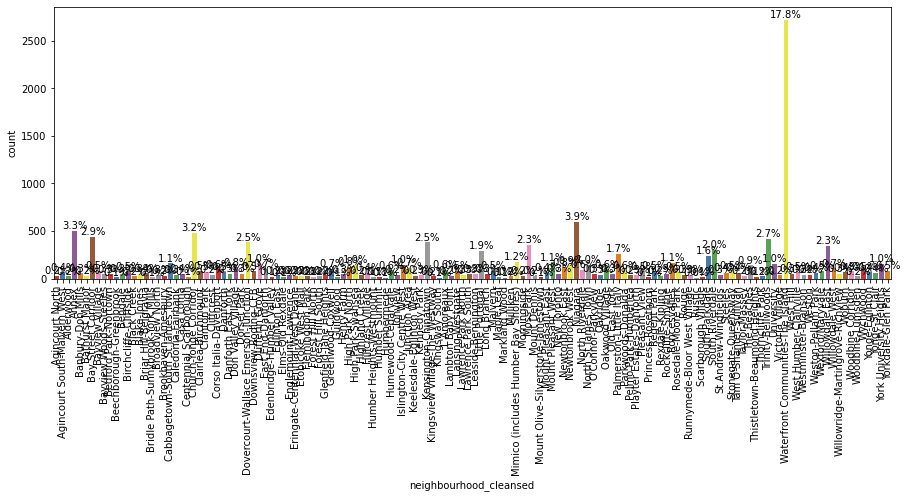

In [29]:
plt.figure(figsize=(15,5))

# use order to sort bars according to the average neghbourhood price
order = df.groupby(['neighbourhood_cleansed'])['price'].mean().index 
axes0 = sns.countplot(data=df, x=df.neighbourhood_cleansed, palette='Set1', order=order)
for p in axes0.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axes0.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom', rotation=0)
axes0.set_xticklabels(axes0.get_xticklabels(),rotation = 90);

### Property Type
<br> Column name = property_type

In [30]:
print(df['property_type'].unique())
print(df['property_type'].isna().sum())

['Entire residential home' 'Private room in rental unit'
 'Private room in residential home' 'Entire rental unit'
 'Entire condominium (condo)' 'Private room in bungalow'
 'Private room in condominium (condo)' 'Entire townhouse'
 'Private room in townhouse' 'Entire loft' 'Entire guest suite'
 'Shared room in rental unit' 'Shared room in parking space'
 'Private room in tiny house' 'Entire guesthouse'
 'Entire serviced apartment' 'Private room in bed and breakfast'
 'Private room in guest suite' 'Private room in cottage'
 'Private room in loft' 'Shared room in residential home'
 'Private room in guesthouse' 'Entire bungalow' 'Room in hostel'
 'Tiny house' 'Private room' 'Shared room in condominium (condo)'
 'Entire place' 'Shared room in townhouse' 'Private room in farm stay'
 'Shared room in bed and breakfast' 'Private room in floor' 'Entire villa'
 'Floor' 'Private room in villa' 'Shared room in bungalow'
 'Private room in castle' 'Shared room in loft' 'Entire home/apt'
 'Shared room 

<br> property_type has lots of unique elements and room_type is descriptive enough.
<br> drop it for now
<br> property_type column may be useful for analysing outliers, etc.

In [31]:
df.drop(columns=['property_type'], inplace=True)

### Number of Reviews and Scores
<br> Column name = 
<br>&emsp;                    'number_of_reviews'
<br>&emsp;                    'number_of_reviews_ltm'
<br>&emsp;                    'number_of_reviews_l30d'
<br>
<br>&emsp;                    'review_scores_rating'
<br>&emsp;                    'review_scores_accuracy'
<br>&emsp;                    'review_scores_cleanliness'
<br>&emsp;                    'review_scores_checkin'
<br>&emsp;                    'review_scores_communication'
<br>&emsp;                    'review_scores_location'
<br>&emsp;                    'review_scores_value'

In [32]:
# if the number_of_reviews is zero the columns listed below in review_cols are NaN
# fillna with 0 in review_cols, and MUST use/keep number_of_reviews to describe zero review_scores_*

n_review_cols = ['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month']

review_score_cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness'
                     , 'review_scores_checkin', 'review_scores_communication', 'review_scores_location'
                     , 'review_scores_value']
for col in review_score_cols:
    df[col].fillna(0, inplace=True)

df['reviews_per_month'].fillna(0, inplace=True)

### Availability
<br> Column name = has_availability

In [33]:
print(df['has_availability'].unique())
print(df['has_availability'].isna().sum())

['t' 'f']
0


### Bookable
<br> Column name = instant_bookable

In [34]:
print(df['instant_bookable'].unique())
print(df['instant_bookable'].isna().sum())

['f' 't']
0


## Get Dummies

In [35]:
df = pd.get_dummies(df, columns=['room_type'], prefix=['room_type'], prefix_sep='_',drop_first=False)

In [36]:
df = pd.get_dummies(df, columns=['neighbourhood_cleansed'], prefix=['neighbourhood'], prefix_sep='_',drop_first=False)

In [37]:
df = pd.get_dummies(df, columns=['has_availability'], prefix=['has_availability'], prefix_sep='_',drop_first=True)

In [38]:
df = pd.get_dummies(df, columns=['instant_bookable'], prefix=['bookable'], prefix_sep='_',drop_first=True)

## Principal Component Analysis and Low Variance Filter

### Room Type

In [39]:
room_type_cols = df.columns[df.columns.str.startswith('room_type')]

In [40]:
df_room_type = df[room_type_cols]

print('Number of room types in each category:')
print(df_room_type.sum())
print()
print('Variance:')
print(df_room_type.var())

Number of room types in each category:
room_type_Entire home/apt    10057
room_type_Hotel room            17
room_type_Private room        4995
room_type_Shared room          189
dtype: int64

Variance:
room_type_Entire home/apt    0.224692
room_type_Hotel room         0.001113
room_type_Private room       0.220213
room_type_Shared room        0.012234
dtype: float64


<br> The above data show that two categories, <I>Hotel Room</I> and <I>Shared Room</I> have a variance less than 0.003.
<br> Using sklearn.feature_selection, VarianceThreshold, we can drop these columns. In other words there is not enough data/information to study variations amoung these two room type categories. 
<br> Here we will implement Principal Component Analysis and use only one component to describe the <I>room type</I> data 

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(df_room_type)

print('Explained Variance Ratio:', pca.explained_variance_ratio_)

room_type_pca = pca.transform(df_room_type)
print('Original number of columns: ', df_room_type.shape[1])
print('Principal Components = ',room_type_pca.shape[1])

Explained Variance Ratio: [0.95641067]
Original number of columns:  4
Principal Components =  1


In [42]:
df.drop(columns=room_type_cols, inplace=True)
df['room_type_pca'] = room_type_pca

### Number of Reviews and Review Scores

In [43]:
# these two list of columns were defined before:

# n_review_cols = ['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month']

# review_score_cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness'
#                    , 'review_scores_checkin', 'review_scores_communication', 'review_scores_location'
#                    , 'review_scores_value']

<br> first we scale the review data (both list of columns for the number of reviews and the review scores)
<br> scaled data are implemented for calculating the correlation coefficients, and extracting the principal componenets

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[n_review_cols])
scaled_n_review_features = scaler.transform(df[n_review_cols])
scaler.fit(df[review_score_cols])
scaled_review_score_features = scaler.transform(df[review_score_cols])

<br> The following graphs show the calculated pairwise correlation of columns using Pearson as the method
<br>
<br> The results highlight very high correlation between different review scores,
<br> whereas, the correlation coefficient between the columns related to the number of reviews are not highly correlated (compared to review scores).

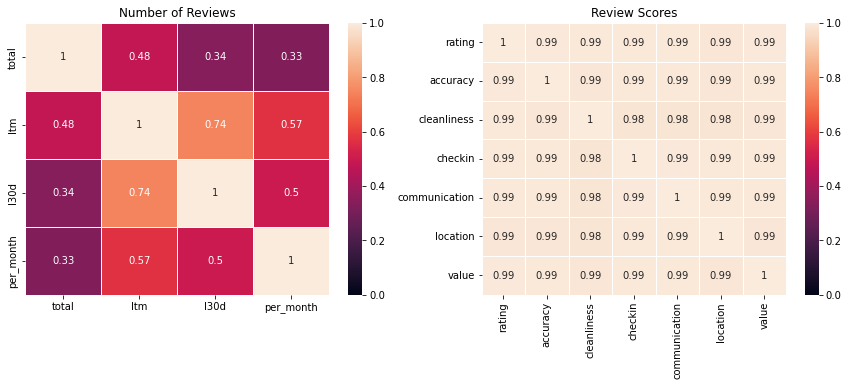

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

n_review_corr = pd.DataFrame(scaled_n_review_features).corr()
labels=['total', 'ltm', 'l30d', 'per_month']
sns.heatmap(n_review_corr, annot=True, linewidths=.5, vmin=0, vmax=1, xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].title.set_text('Number of Reviews')

review_score_corr = pd.DataFrame(scaled_review_score_features).corr()
labels=[]
for txt in review_score_cols:
    labels.append(txt.replace('review_scores_', ''))
sns.heatmap(review_score_corr, annot=True, linewidths=.5, vmin=0, vmax=1, xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].title.set_text('Review Scores')

<br> Here, Principal Component Analysis (PCA) is used to reduce the dimentionality
<br> As we saw in the previous figure, different <i>Review Scores</i> are highly correlated and reducing the dimensionality is necessary to mitigate collinearity
<br> i.e., different <i>Review Scores</i> columns are not independent from one another, and a single PCA somponent captures 99% of the variance

In [46]:
pca = PCA(n_components=1)
# using scaled features (obtained from MinMaxScaler, not the raw review scores) as an input for PCA
pca.fit(scaled_review_score_features)

print('Explained Variance Ratio:', pca.explained_variance_ratio_)
# print('Total Explained Variance Ratio:', pca.explained_variance_ratio_.sum())

review_pca = pca.transform(scaled_review_score_features)
print('Original number of columns: ', df[review_score_cols].shape[1])
print('Principal Components: ', review_pca.shape[1])

Explained Variance Ratio: [0.99032683]
Original number of columns:  7
Principal Components:  1


In [47]:
df.drop(columns=review_score_cols, inplace=True)
df['review_pca'] = review_pca

In [48]:
df.head()

,id,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,neighbourhood_Woodbine-Lumsden,neighbourhood_Wychwood,neighbourhood_Yonge-Eglinton,neighbourhood_Yonge-St.Clair,neighbourhood_York University Heights,neighbourhood_Yorkdale-Glen Park,has_availability_t,bookable_t,room_type_pca,review_pca
0,1419,10,5.0,7.0,469.0,28,730,0,0,0,...,0,0,0,0,0,0,1,0,-0.472636,-0.729530
1,8077,2,1.0,1.0,96.0,180,365,30,60,90,...,0,0,0,0,0,0,1,1,0.941523,-0.658534
2,23691,3,1.0,1.0,72.0,28,28,30,60,90,...,0,0,0,0,0,0,1,1,0.941523,-0.593587
3,27423,1,1.0,1.0,45.0,365,365,0,0,5,...,0,0,0,0,0,0,1,0,-0.472636,-0.683014
4,30931,2,1.0,2.0,128.0,180,365,30,60,90,...,0,0,0,0,0,0,1,0,-0.472636,1.540369


## Scaling and Transforming the Data

In [49]:
df.price = np.log10(df.price)

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
df_feat = pd.DataFrame(scaled_features, columns=df.columns)

In [52]:
col_features = df.columns.drop('price')
col_target = ['price']

scaler_feat = MinMaxScaler()
scaler_feat.fit(df[col_features])
scaled_features = scaler_feat.transform(df[col_features])
df_feat = pd.DataFrame(scaled_features, columns=col_features)

scaler_target = MinMaxScaler()
scaler_target.fit(df[col_target])
scaled_target = scaler_target.transform(df[col_target])
df_target = pd.DataFrame(scaled_target, columns=col_target)

X = df_feat
y = df_target

## Linear Regression Analysis

<br> In this section, I use Linear Regression Analysis (Ordinary Least Squares, OLS)
<br> The calculated p-values and coefficients point out the statistically significant relationships

In [53]:
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
results = est.fit()
# print(results.summary())

C:\Users\siava\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<br> Creating a pandas DataFrame using Ordinary Least Squares (OLS) results

In [54]:
results_df = pd.DataFrame(data=list(zip(results.params.values,results.bse.values, results.tvalues.values
                                        , results.pvalues.values, results.conf_int().values[:,0]
                                        , results.conf_int().values[:,1])))
results_df.index=results.params.index
results_df.columns=['coef', 'std_err', 't_value', 'p_value', 'conf_int_0.25', 'conf_int_0.75']
results_df.drop(index=['const', 'id'], axis=0, inplace=True)

<br> highlighting statistically significant features using p_value<0.05

In [55]:
results_df.sort_values(by=['coef'], key=abs, ascending=False, inplace=True)
results_df.style.highlight_between(subset=['p_value'], left=0, right=0.05, color='#5fba7d')\
                .highlight_between(subset=['p_value'], left=0.05, right=1, color='#d65f5f')\
                .bar(subset=['coef'], align='zero', color=['#d65f5f', '#5fba7d'])

,coef,std_err,t_value,p_value,conf_int_0.25,conf_int_0.75
accommodates,0.184188,0.008320,22.136838,0.000000,0.167879,0.200497
bathroom_numbers,0.170718,0.010175,16.778194,0.000000,0.150774,0.190662
minimum_nights,-0.167743,0.016661,-10.067850,0.000000,-0.200401,-0.135085
bedrooms,0.149844,0.011399,13.145315,0.000000,0.127500,0.172187
neighbourhood_Black Creek,-0.103003,0.014081,-7.314954,0.000000,-0.130604,-0.075402
number_of_reviews,-0.077225,0.011272,-6.850826,0.000000,-0.099320,-0.055130
neighbourhood_Waterfront Communities-The Island,0.066562,0.001736,38.342095,0.000000,0.063160,0.069965
neighbourhood_Malvern,-0.061357,0.007873,-7.793104,0.000000,-0.076789,-0.045924
neighbourhood_Niagara,0.056569,0.003049,18.552862,0.000000,0.050592,0.062545
neighbourhood_Bedford Park-Nortown,-0.054037,0.010245,-5.274342,0.000000,-0.074119,-0.033955


## Results - Statistically Significant Features

<br> Extracting the list of significant features
<br> Note that <i>Neighbourhood</i> is always a significant factor in estimating the price

In [56]:
# List of significant features
sign_feat = list(results_df[results_df['p_value']<0.05].index)

# In addition to the neighbourhood, sign_feat is a list of features that 
# are statistically significant for describing the price
sign_feat = [x for x in sign_feat if not x.startswith('neighbourhood')]
print(sign_feat)

# saving the list of significant features in a list (excluding neighbourhood)
# this list/text_file will be used to compare the significant features in different cities
textfile = open(f"{city}_feat.txt", "w")
for element in sign_feat:
    textfile.write(element + "\n")
textfile.close()

['accommodates', 'bathroom_numbers', 'minimum_nights', 'bedrooms', 'number_of_reviews', 'number_of_reviews_ltm', 'bath_is_shared', 'room_type_pca', 'availability_30', 'has_availability_t', 'availability_60', 'bookable_t', 'review_pca']


<br> List of <i>Neighbourhood</i> columns

In [57]:
neighbourhood_cols = [col for col in df_feat if col.startswith('neighbourhood')]

## Model - Estimating Price

In [58]:
X = df_feat[sign_feat + neighbourhood_cols] # Significant features and Neighbourhood
y = df_target # log10_price

In [59]:
# using sklearn train_test_split and splitting the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
# using sklearn LinearRegression as the model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

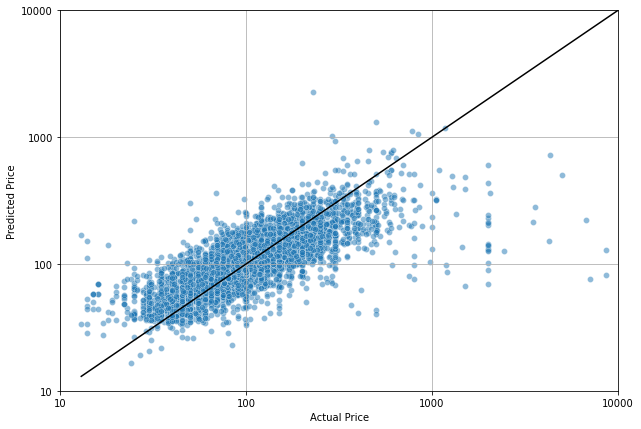

In [67]:
# plotting the results
# comparing price predictions with the test values
x_values = scaler_target.inverse_transform(y_test)
y_values = scaler_target.inverse_transform(predictions)
min_value = min(min(x_values), min(y_values))
max_value = max(max(x_values), max(y_values))

fig, ax = plt.subplots(figsize=(10, 7))

plt.plot([min_value,max_value],[min_value,max_value], color='black')
sns.scatterplot(x=x_values[:,0], y=y_values[:,0], alpha=0.5)
ax.set(xlabel='Actual Price', ylabel='Predicted Price', xlim=(1,4), ylim=(1,4));
xy_range=np.arange(1, 5, step=1)
ax.set_xticks(xy_range)
ax.set_xticklabels(10**xy_range)
ax.set_yticks(xy_range)
ax.set_yticklabels(10**xy_range)
ax.grid(True)

<br> saving prediction results (predictions and y_test) to csv file

In [66]:
prediction_results = pd.DataFrame(data=(scaler_target.inverse_transform(predictions)[:,0]), columns=['predictions'])
prediction_results['y_test'] = np.array(scaler_target.inverse_transform(y_test))

prediction_results.to_csv(f'{city}_pred.csv', index=False);

### Evaluating the Model
<br> using sklearn metrics
<br> calculating r2_score, Mean Absolute Error, Mean Square Error, and Root Mean Square Error

In [63]:
from sklearn import metrics

print('r2_score:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r2_score: 0.5395064010346573
MAE: 0.04977828404004358
MSE: 0.005180265849286771
RMSE: 0.07197406372636445
